# **Sio-Granos EDA**

## **Importo las librerias a utilizar**

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

## **Cargo la data preprocesada del output**

In [122]:

if os.path.isfile("./Data/Output/data.csv"):
    data = pd.read_csv("./Data/Output/data.csv",sep=',',encoding='utf-8',index_col=0)
    print("Puede continuar con EDA.py")
else:
    print("Correr prepro.py para obtener los datos preprocesados")

Puede continuar con EDA.py


## **Primeras vistas de los datos**

### *Primeros 7 registros*

In [3]:
data.head(7)

,Provincia,Cultivo,LugarEntrega,Mes,Ano,CantTns,EsFinal,EleccionesNac,EleccionesPre,ProdTns,EstresClimatico,MismaProvDestino
0,BUENOS AIRES,Maiz,B.Blanca,1,2015.0,919.42,True,True,True,8893434.0,True,True
1,BUENOS AIRES,Maiz,B.Blanca,1,2016.0,38120.00,True,False,False,10147679.0,True,True
2,BUENOS AIRES,Maiz,B.Blanca,1,2017.0,12845.04,True,True,False,12955509.0,True,True
3,BUENOS AIRES,Maiz,B.Blanca,1,2018.0,49405.00,True,False,False,12770903.0,True,True
4,BUENOS AIRES,Maiz,B.Blanca,1,2019.0,15808.00,True,True,True,16770895.0,True,True
5,BUENOS AIRES,Maiz,B.Blanca,1,2020.0,24770.00,True,False,False,NaN,False,True
6,BUENOS AIRES,Maiz,B.Blanca,2,2015.0,114627.03,True,True,True,8893434.0,True,True


### *Random de 7 registros*

In [4]:
data.sample(n=7)

,Provincia,Cultivo,LugarEntrega,Mes,Ano,CantTns,EsFinal,EleccionesNac,EleccionesPre,ProdTns,EstresClimatico,MismaProvDestino
22200,BUENOS AIRES,Maiz,Zona 12,10,2019.0,680.00,False,True,True,16770895.0,True,False
4259,CHACO,Maiz,Zona 15,9,2018.0,2459.35,True,False,False,1604355.0,False,True
19909,SANTIAGO DEL ESTERO,Soja total,Zona 16,4,2016.0,1132.26,True,False,False,2498134.0,False,False
21287,TUCUMAN,Soja total,Zona 11,4,2015.0,3350.00,True,True,True,413749.0,False,False
7770,CORDOBA,Soja total,Zona 10,6,2017.0,18608.79,True,True,False,15659788.0,False,True
8954,CORDOBA,Trigo total,Zona 14,1,2019.0,2239.10,True,True,True,3271488.0,False,False
16968,SANTA FE,Soja total,Quequen,4,2015.0,638.00,True,True,True,11804131.0,False,False


### *¿Cúal es el tamaño de la data?*

In [5]:
rows, columns = data.shape
print(f"filas = {rows}, columnas = {columns}")

filas = 33325, columnas = 12


### *Formato y contenido de las columnas*

**Contenido de las columnas:**
* *Provincia*: Provincia de origen.
* *Cultivo*: Tipo de cultivo, opciones Maíz, Soja o Trigo.
* *LugarEntrega*: Zona de entrega según SIO-GRANOS.
* *Mes*: Mes del flujo de comercialización.
* *Ano*: Año del flujo de comercialización.
* *CantTns*: Cantidad de granos comercializada en toneladas.
* *EsFinal*: Boolean que indica si es destino final o no.
* *EleccionesNac*: Boolean que indica si en el año hubo elecciones nacionales.
* *EleccionesPre*: Boolean que indica si en el año hubo elecciones presidenciales.
* *ProdTns*: Cantidad de granos producida en toneladas.
* *EstresClimatico*: Boolean que indica si hubo una pérdida de área superior al 20%.
* *MismaProvDestino*: Boolean que indica si la zona de entrega incluye la provincia de origen.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33325 entries, 0 to 33324
Data columns (total 12 columns):
Provincia           33325 non-null object
Cultivo             33325 non-null object
LugarEntrega        33325 non-null object
Mes                 33325 non-null int64
Ano                 33325 non-null float64
CantTns             33325 non-null float64
EsFinal             33325 non-null bool
EleccionesNac       33325 non-null bool
EleccionesPre       33325 non-null bool
ProdTns             30497 non-null float64
EstresClimatico     33325 non-null bool
MismaProvDestino    33325 non-null bool
dtypes: bool(5), float64(3), int64(1), object(3)
memory usage: 2.2+ MB


#### *Cambio a categoria Mes y Año*

In [190]:
data['Mes'] = data['Mes'].astype('category')
data['Ano'] = data['Ano'].astype('category')

### *Todos los nulos se encuentran en la columna ProdTns*

In [6]:
data.isnull().sum()

Provincia              0
Cultivo                0
LugarEntrega           0
Mes                    0
Ano                    0
CantTns                0
EsFinal                0
EleccionesNac          0
EleccionesPre          0
ProdTns             2828
EstresClimatico        0
MismaProvDestino       0
dtype: int64

Esto se produce por dos motivos: 

* No existen estimaciones de producción oficiales a nivel de localidad o provincia para el 2020, 2021 y 2022


In [9]:
data.loc[data.ProdTns.isnull(),"Ano"].value_counts()

2020.0    1519
2019.0     301
2016.0     275
2018.0     259
2017.0     237
2015.0     207
2021.0      25
2022.0       5
Name: Ano, dtype: int64

* No hay producción de maíz, trigo y soja en ciertas provincias 

(ojo, que esten no es un error, pueden ser destino intermedio)

In [30]:
a = data.loc[(data.ProdTns.isnull()) & (~data.Ano.isin([2020,2021,2022])),("Cultivo","Provincia")]

a = a.groupby(["Cultivo"])["Provincia"].value_counts()
print(a)

Cultivo      Provincia                      
Maiz         CIUDAD AUTONOMA DE BUENOS AIRES    293
             MENDOZA                             39
             RIO NEGRO                            8
             SAN JUAN                             6
             LA RIOJA                             5
             CHUBUT                               2
             NEUQUEN                              2
             SANTA CRUZ                           1
Soja total   CIUDAD AUTONOMA DE BUENOS AIRES    397
             MENDOZA                             70
             LA RIOJA                            20
             NEUQUEN                              9
             RIO NEGRO                            7
             SAN JUAN                             5
             CHUBUT                               4
             TIERRA DEL FUEGO                     1
Trigo total  CIUDAD AUTONOMA DE BUENOS AIRES    284
             MENDOZA                             34
             CORRIE

### *Descripción de cada columna*

#### **Vista general**

In [11]:
include =['object', 'float', 'int',"bool","category"]
data.describe(include = include)

,Provincia,Cultivo,LugarEntrega,Mes,Ano,CantTns,EsFinal,EleccionesNac,EleccionesPre,ProdTns,EstresClimatico,MismaProvDestino
count,33325,33325,33325,33325.0,33325.0,3.332500e+04,33325,33325,33325,3.049700e+04,33325,33325
unique,24,3,25,12.0,8.0,NaN,2,2,2,NaN,2,2
top,BUENOS AIRES,Maiz,Rosario N,12.0,2016.0,NaN,True,True,False,NaN,False,False
freq,5938,11842,3961,3202.0,6534.0,NaN,21833,18625,20925,NaN,28103,22513
mean,NaN,NaN,NaN,NaN,NaN,1.532754e+04,NaN,NaN,NaN,5.618453e+06,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6.123055e+04,NaN,NaN,NaN,5.932993e+06,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN,NaN,NaN,3.613000e+03,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.800000e+02,NaN,NaN,NaN,1.115157e+06,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.369380e+03,NaN,NaN,NaN,3.027430e+06,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,7.267110e+03,NaN,NaN,NaN,9.017580e+06,NaN,NaN


#### **CantTns**

Concentracion de pequeñas cantidades transportadas

Vista en miles de toneladas

In [13]:
data['CantTns'].describe()/1000


count      33.325000
mean       15.327545
std        61.230551
min         0.000010
25%         0.280000
50%         1.369380
75%         7.267110
max      2022.575680
Name: CantTns, dtype: float64

Distribucion asimétrica, sesgada hacia la derecha

In [15]:
data['CantTns'].skew()

12.304893703868022

Visualmente se puede llegar a la misma conclusión

[Text(0, 0.5, 'Porcentaje de Casos'),
 Text(0.5, 0, 'Miles de Toneladas Transportadas'),
 Text(0.5, 1.0, 'Histograma de Cantidades Transportadas')]

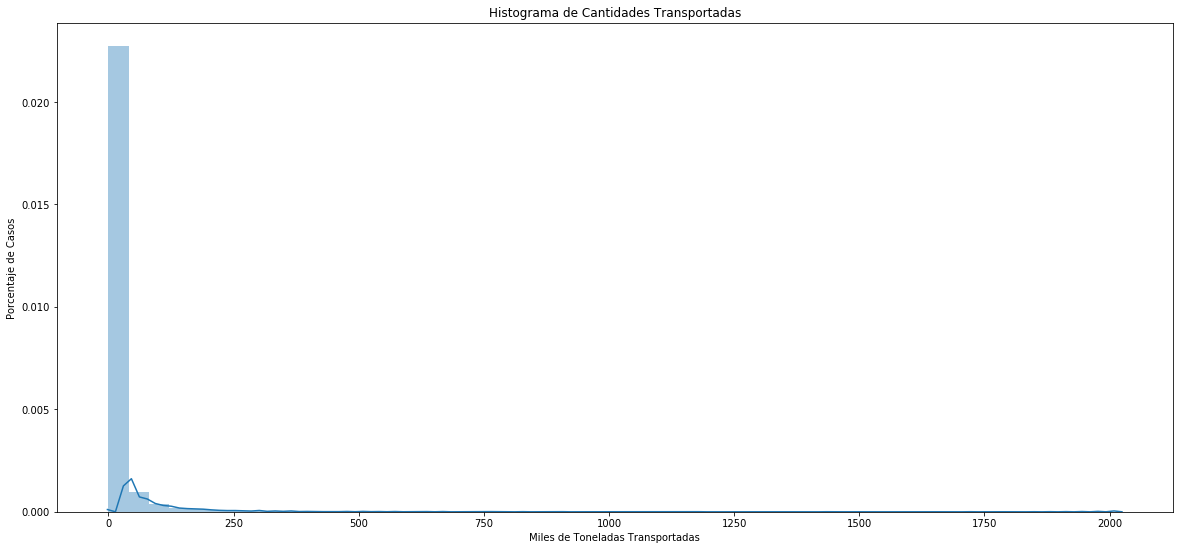

In [56]:
f, ax = plt.subplots(figsize=(20, 9))
sns.distplot((data['CantTns']/1000)).set(xlabel='Miles de Toneladas Transportadas', ylabel='Porcentaje de Casos', title='Histograma de Cantidades Transportadas')

#### *Provincia de Origen*

¿Cuáles son todas las provincias de origen?

In [82]:
data.Provincia.unique()

array(['BUENOS AIRES', 'CATAMARCA', 'CHACO', 'CHUBUT',
       'CIUDAD AUTONOMA DE BUENOS AIRES', 'CORDOBA', 'CORRIENTES',
       'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA', 'LA RIOJA',
       'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA', 'SAN JUAN',
       'SAN LUIS', 'SANTA CRUZ', 'SANTA FE', 'SANTIAGO DEL ESTERO',
       'TIERRA DEL FUEGO', 'TUCUMAN'], dtype=object)

¿De donde proviene la mayor cantidad de toneladas transportadas?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

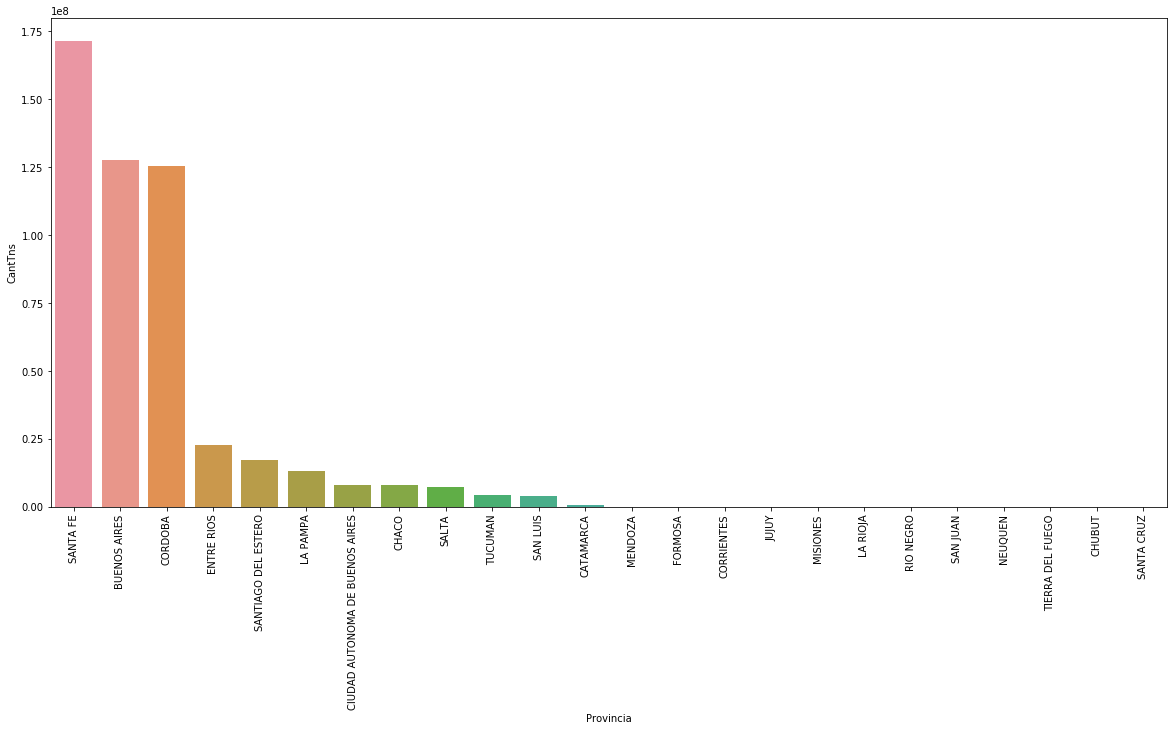

In [104]:
b = data.groupby(['Provincia']).agg({"CantTns":'sum'})
b = b.sort_values('CantTns',ascending=False)
b.reset_index(level=0, inplace=True)


f, ax = plt.subplots(figsize=(20, 9))
sns.barplot(x='Provincia', y="CantTns", data=b)
plt.xticks(rotation='vertical')


¿De donde proviene la mayor cantidad de toneladas por cultivo?

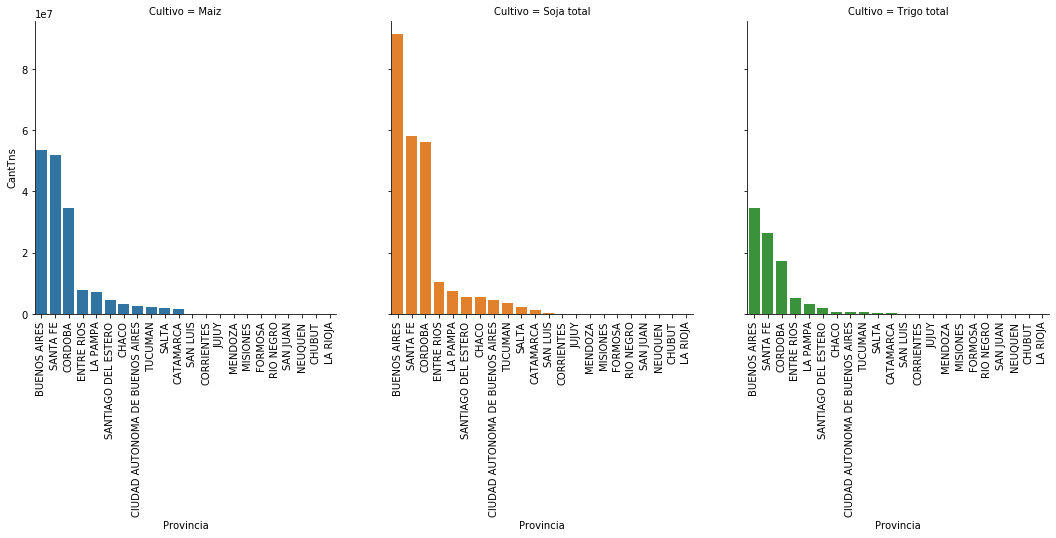

In [153]:
a = data.groupby(['Provincia',"Cultivo"]).agg({"CantTns":'sum'})
a = a.sort_values('CantTns',ascending=False)
a.dropna(inplace=True)
a.reset_index(level=[0,1], inplace=True)


g = sns.FacetGrid(a, col="Cultivo", hue="Cultivo",height=5)
g = g.map(sns.barplot,'Provincia', "CantTns")
g = g.set_xticklabels(rotation=90)

#### *Lugar de Entrega*

¿Cuáles son los lugares de entrega con mayor importancia por cultivo?

Los destinos a los que van la mayoría de los granos son los puertos ubicados en Rosario (Norte y Sur), Bahía Blanca, Quequén y Buenos Aires.

Debido a la mayor concentración de producción de trigo en Buenos Aires, las cantidades de grano que finalizan en los puertos es más pareja. 

Los lugares de destino no se alteran incluso aunque el destino no sea final.

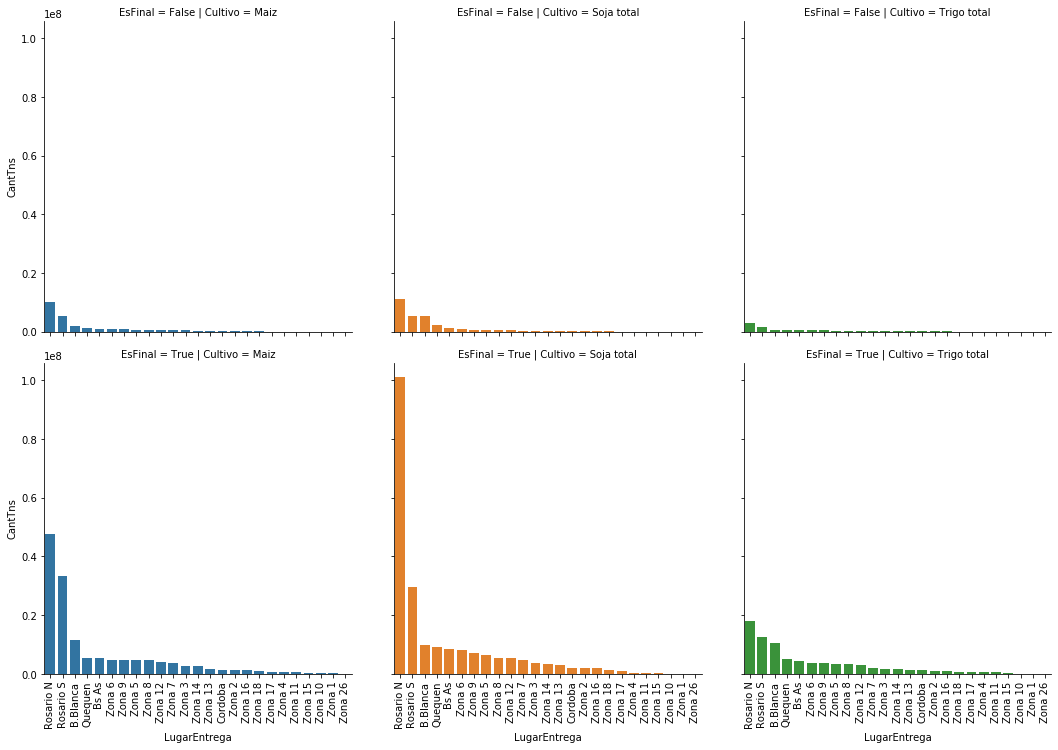

In [157]:
d = data.groupby(['LugarEntrega',"Cultivo","EsFinal"]).agg({"CantTns":'sum'})
d = d.sort_values('CantTns',ascending=False)
d.dropna(inplace=True)
d.reset_index(level=[0,1,2], inplace=True)


g = sns.FacetGrid(d, col="Cultivo", row="EsFinal" , hue="Cultivo",height=5)
g = g.map(sns.barplot,'LugarEntrega', "CantTns")
g = g.set_xticklabels(rotation=90)

#### *Mes*

A lo largo de los distintos meses la distribución de toneladas transportadas varía por cultivo. Como se puede observar en los boxplot, el transporte de cultivos presenta cierta estacionalidad.

Además, esta estacionalidad esta relacionada con el periódo de cosecha de cada cultivo:
* *Maíz*: Tiene dos picos estacionales de cosecha. Uno en marzo - abril, que es cuando se cosecha el maíz temprano, y el otro en julio - agosto, que es cuando se cosecha el maiz tardío.
* *Soja*: Tiene dos picos estacionales de cosecha. Uno en mayo - julio, que es cuando se cosecha la soja de primera, y el otro en agosto - octubre, que es cuando se cosecha la soja de segunda.
* *Trigo*: Tiene un pico estacional de cosecha, que va desde mediados de noviembre a febrero.

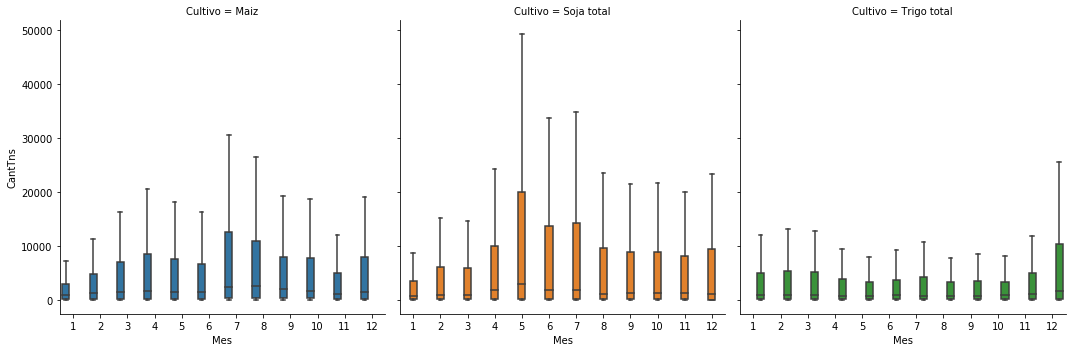

In [46]:
data['Mes'] = data['Mes'].astype('category')

sns.factorplot(x="Mes", y="CantTns", data=data,col="Cultivo", kind='box',showfliers=False,hue="Cultivo")

Respecto a como varían las cantidades según el lugar de origen y el destino a lo largo de los distintos meses del año, podemos concluir de los siguientes heatmaps que las diferencias siguen siendo notorias entre los principales lugares de origen y destinos, incluso a lo largo de todos los meses del año. 

En todos los meses, se destacan Buenos Aires, Córdoba y Santa Fé como lugar de origen. Mientras que, la zona porturia de Rosario (Norte y Sur) se destaca como principal destino.

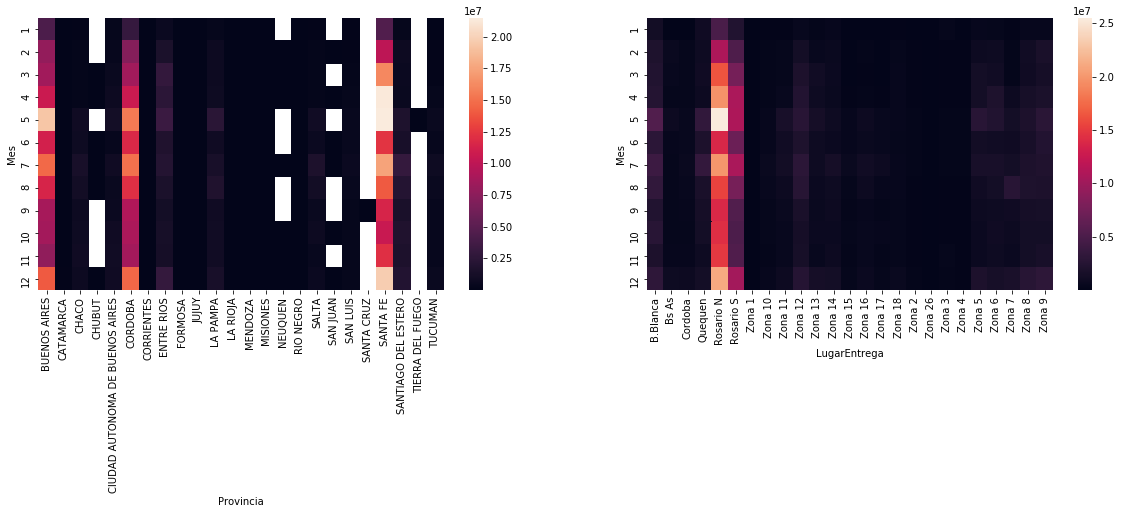

In [70]:
d = data.groupby(['Provincia',"Mes"]).agg({"CantTns":'sum'})
d = d.sort_values('CantTns',ascending=False)
d.dropna(inplace=True)
d.reset_index(level=[0,1], inplace=True)
d = d.pivot("Mes", "Provincia", "CantTns")

e = data.groupby(['LugarEntrega',"Mes"]).agg({"CantTns":'sum'})
e = e.sort_values('CantTns',ascending=False)
e.dropna(inplace=True)
e.reset_index(level=[0,1], inplace=True)
e = e.pivot("Mes", "LugarEntrega", "CantTns")


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 5))
sns.heatmap(d, ax=ax1)
sns.heatmap(e, ax=ax2)
plt.show()

#### *Cruce entre Provincia origen y Lugar Entrega*

Entre las provincias de origen con mayor cantidad de toneladas transportadas, Buenos Aires, Córdoba y Santa Fé, se puede destacar que solamente Buenos Aires tiene como lugar de entrega al puerto de Quequén y Bahía Blanca.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
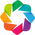

:Chord   [source,target]   (value)

In [115]:
import sys
#!conda install --yes --prefix {sys.prefix} holoviews
import holoviews as hv
from holoviews import opts, dim

links = data.groupby(["Provincia",'LugarEntrega']).agg({"CantTns":'sum'})
links.dropna(inplace=True)
links.reset_index(level=[0,1], inplace=True)

# renombro columnas source  target  value
links.rename(columns={'Provincia':'source',
                          'LugarEntrega':'target',
                          'CantTns':'value'}, 
                 inplace=True)

hv.extension('bokeh')
hv.output(size=200)
chord = hv.Chord((links)).select(value=(5, None))

#chord --> basic
ob = chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
               labels='names', node_color=dim('index').str()))
ob


#### *EleccionesNac*

En años con elecciones nacionales el porcentaje de toneladas transportadas respecto a las cantidades producidas se reduce drásticamente. La excepción ocurre en el año 2019, ya que para ese año hasta Agosto las productores tenían expectativas de una continuidad del gobierno de turno.


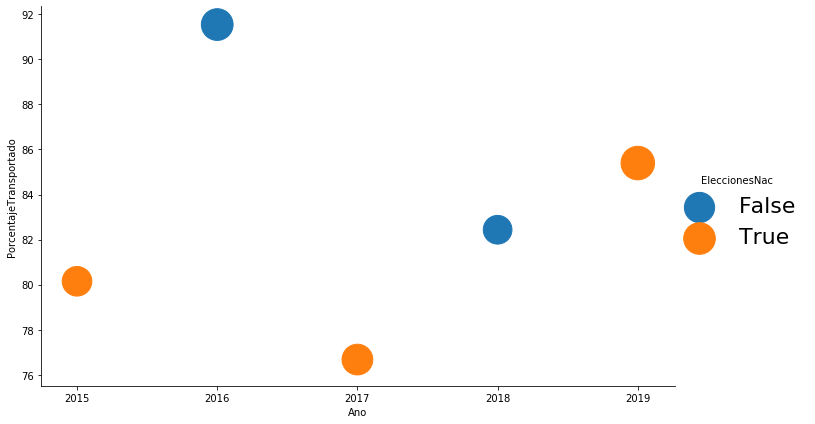

In [231]:
a = data.groupby(["Ano","EleccionesNac"]).agg({"CantTns":'sum'})
a.reset_index(level=[0,1], inplace=True)
a.dropna(inplace=True)


#Cargo archivo de producción de http://datosestimaciones.magyp.gob.ar/
prod = pd.read_csv("./Data/Produccion/Estimaciones.csv",sep=';',encoding='latin-1')
#selecciono los granos que me interesan
prod = prod.loc[(prod.Cultivo == 'Maíz') | (prod.Cultivo == 'Soja total') | (prod.Cultivo == 'Trigo total')]
#Selecciono las columnas a utilizar
prod = prod[['Provincia',"Cultivo","Campana","Sup. Sembrada (Ha)","Sup. Cosechada (Ha)","Producción (Tn)"]]
#Agrupo por provincia, cultivo, campana
#sumarizo "Sup. Sembrada (Ha)","Sup. Cosechada (Ha)","Producción (Tn)"
prod = prod.groupby(['Provincia',"Cultivo","Campana"]).agg({"Sup. Sembrada (Ha)":'sum',"Sup. Cosechada (Ha)":'sum',"Producción (Tn)":'sum'}).reset_index()
#Genero campo Año con los ultimos números de la campaña
nuevo = prod['Campana'].str.split("/",expand = True)
prod["Ano"]= nuevo[1]
del nuevo
#Le agrego 20 adelante a cada Año
prod['Ano'] = "20" + prod['Ano']
#Renombro las columnas: estres climatico y produccion
prod = prod.rename(columns={'Producción (Tn)': 'ProdTns'})
prod = prod.groupby(['Ano']).agg({"ProdTns":'sum'}).reset_index()
#acomodo los tipos
a["Ano"] = a["Ano"].astype("int")
prod['Ano'] = prod['Ano'].astype('int')
prod["ProdTns"] = prod["ProdTns"].astype("float")
#genero el dataset para plotear
elec = pd.merge(a, prod, how='left', on=['Ano'])
elec["PorcentajeTransportado"] = elec["CantTns"] / elec["ProdTns"]*100
elec = elec.iloc[0:5,]


#plt.scatter(elec["Ano"], elec["PorcentajeTransportado"], s=elec["ProdTns"]/100000, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
elec["CantTns"] = elec["CantTns"]/100000
fg = sns.FacetGrid(data=elec, hue='EleccionesNac', aspect=1.61,height=6)
fg.map(plt.scatter, 'Ano', 'PorcentajeTransportado', "CantTns").add_legend(prop={'size': 22})


In [235]:
## Todos los boolean
"""
EN CUADROS

EsFinal             33325 non-null bool
EstresClimatico     33325 non-null bool
MismaProvDestino    33325 non-null bool
"""

'\nEN CUADROS\n\nEsFinal             33325 non-null bool\nEstresClimatico     33325 non-null bool\nMismaProvDestino    33325 non-null bool\n'

In [ ]:
#### *Es destino final*



In [ ]:
a = data.groupby(["Ano","EleccionesNac"]).agg({"CantTns":'sum'})
a.reset_index(level=[0,1], inplace=True)
a.dropna(inplace=True)

#### *Años*

Participación en porcentaje de los años en el dataset

In [20]:
data.Ano.value_counts(normalize=True,ascending=True)*100

2022.0     0.015004
2021.0     0.075019
2020.0     5.797449
2015.0    17.824456
2018.0    18.562641
2017.0    18.703676
2019.0    19.414854
2016.0    19.606902
Name: Ano, dtype: float64

### *Matriz de Correlaciones*

In [18]:
data.corr()

,CantTns,EsFinal,EleccionesNac,EleccionesPre,ProdTns,EstresClimatico,MismaProvDestino
CantTns,1.000000,0.110278,0.008451,0.009914,0.173126,0.006913,0.170237
EsFinal,0.110278,1.000000,-0.012491,-0.002861,-0.096402,-0.006463,-0.133166
EleccionesNac,0.008451,-0.012491,1.000000,0.683894,0.080546,0.042141,-0.003061
EleccionesPre,0.009914,-0.002861,0.683894,1.000000,0.050983,0.060956,-0.000407
ProdTns,0.173126,-0.096402,0.080546,0.050983,1.000000,0.067176,0.204544
EstresClimatico,0.006913,-0.006463,0.042141,0.060956,0.067176,1.000000,0.057264
MismaProvDestino,0.170237,-0.133166,-0.003061,-0.000407,0.204544,0.057264,1.000000


Visualización de la matriz de correlaciones

Los aspectos mas importantes a destacar son que:
* No pareciera haber correlaciones fuertes entre las variables (salvo Elecciones Nacionales y Presidenciales).
* Las producciones provinciales se correlacionan negativamente con provincias que son destinos finales del grano.
* Provincias que son destinos Finales se correlacionan negativamente con destinos a misma provincia.

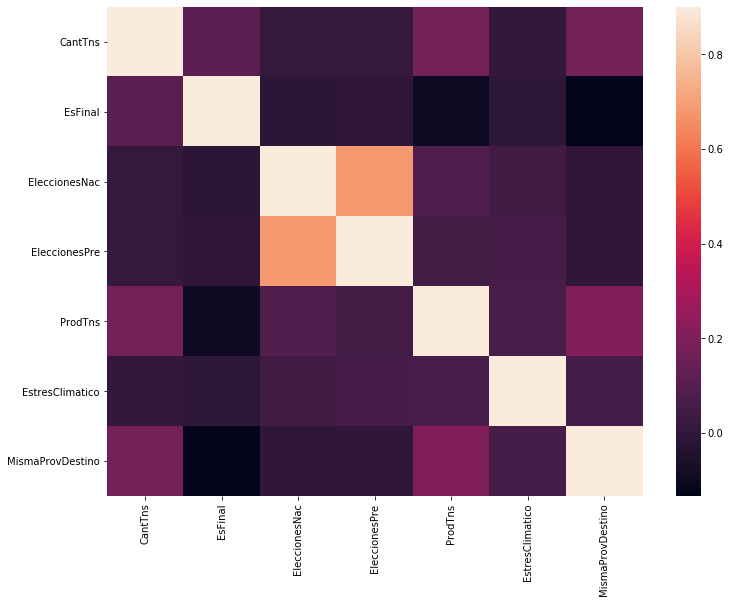

In [234]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9)

## *Ahora vamos a analizar las 4 hipótesis*

1. Las zonas más alejadas a los puertos tienen una mayor comercialización hacia zonas aledañas, debido al mayor costo de transporte.
2. Los flujos comerciales varían según el tipo de grano, debido a la estacionalidad de su cosecha.
3. En zonas con problemas climáticos, se aumenta la comercialización hacia destinos finales (sin pasar por acopios), porque los productores tienen mayor poder de negociación.
4. Las campañas que se encuentran atravesadas por elecciones presidenciales tienen una mayor dilatación de la comercialización, producto de las expectativas sobre posibles cambios en las políticas agrícolas.
